In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
dj = pd.read_csv('kidney_disease (1).csv')
dj

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
ds.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells',
                     'pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea',
                     'sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume',
                     'wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus',
                     'cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'classes'},inplace=True)
ds.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [43]:
cat = ds.select_dtypes(exclude = 'number')
num = ds.select_dtypes(include = 'number')

print('Categorical Database')
display(cat.head())
print('Numerical Dataset')
display(num.head())

Categorical Database


""
0
1
2
3
4


Numerical Dataset


,age,hemoglobin,blood urea,blood glucose random,serum creatinine,sodium,white blood cell count,packed cell volume,classes
0,48.0,15.4,36.0,121.0,1.2,138.0,72,32,0
1,7.0,11.3,18.0,121.0,0.8,138.0,56,26,0
2,62.0,9.6,53.0,423.0,1.8,138.0,70,19,0
3,48.0,11.2,56.0,117.0,3.8,111.0,62,20,0
4,51.0,11.6,26.0,106.0,1.4,138.0,68,23,0


In [7]:
ds = dj.copy()

In [35]:
ds.isnull().sum()

age                       0
hemoglobin                0
blood urea                0
blood glucose random      0
serum creatinine          0
sodium                    0
white blood cell count    0
packed cell volume        0
classes                   0
dtype: int64

In [9]:
for i in ds.columns:
    if (ds[i].isnull().sum()/ len(ds)).round(2) * 100 < 30:    # ----------- Get percentage missing
        if ds[i].dtypes != 'O':                 # ---------------------------- Check the dsta type of the column
            ds[i].fillna(ds[i].median(), inplace = True) # ----------------- Fill with the median if its a numericla column
        else:
            ds[i].fillna(ds[i].mode()[0], inplace = True) 
    else:
        ds.drop(i, axis = 1, inplace = True)


ds.isnull().sum()

id                         0
age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
classes                    0
dtype: int64

In [10]:
ds.drop('id', axis=1, inplace= True)

In [27]:
ds['white blood cell count'] = pd.to_numeric(ds['white blood cell count'], errors = 'coerce')

In [33]:
ds['packed cell volume'] = pd.to_numeric(ds['packed cell volume'], errors = 'coerce')

In [28]:
ds

,age,hemoglobin,blood urea,blood glucose random,serum creatinine,sodium,white blood cell count,packed cell volume,classes
0,48.0,15.4,36.0,121.0,1.2,138.0,72,32,0
1,7.0,11.3,18.0,121.0,0.8,138.0,56,26,0
2,62.0,9.6,53.0,423.0,1.8,138.0,70,19,0
3,48.0,11.2,56.0,117.0,3.8,111.0,62,20,0
4,51.0,11.6,26.0,106.0,1.4,138.0,68,23,0
...,...,...,...,...,...,...,...,...,...
395,55.0,15.7,49.0,140.0,0.5,150.0,62,35,2
396,42.0,16.5,31.0,75.0,1.2,141.0,72,42,2
397,12.0,15.8,26.0,100.0,0.6,137.0,61,37,2
398,17.0,14.2,50.0,114.0,1.0,135.0,67,39,2


In [12]:
ds.describe()

,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000


In [13]:

from sklearn.preprocessing import LabelEncoder
encoded = {}
import joblib

for i in ds.select_dtypes(exclude = 'number'):   # ............................. Select all categorical variables
    encoder = LabelEncoder() # ................................................. Instantiated the encoder
    ds[i] = encoder.fit_transform(ds[i]) # ..................................... transformed the variables involved
    encoded[i + '_encoder'] = encoder # ..................................... saved the encoders into a dictionary for easy access
    joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb')) # ..................... Save the encoder into my file directory

encoded

{'pus cell_encoder': LabelEncoder(),
 'pus cell clumps_encoder': LabelEncoder(),
 'bacteria_encoder': LabelEncoder(),
 'packed cell volume_encoder': LabelEncoder(),
 'white blood cell count_encoder': LabelEncoder(),
 'hypertension_encoder': LabelEncoder(),
 'diabetes mellitus_encoder': LabelEncoder(),
 'coronary artery disease_encoder': LabelEncoder(),
 'appetite_encoder': LabelEncoder(),
 'pedal edema_encoder': LabelEncoder(),
 'anemia_encoder': LabelEncoder(),
 'classes_encoder': LabelEncoder()}

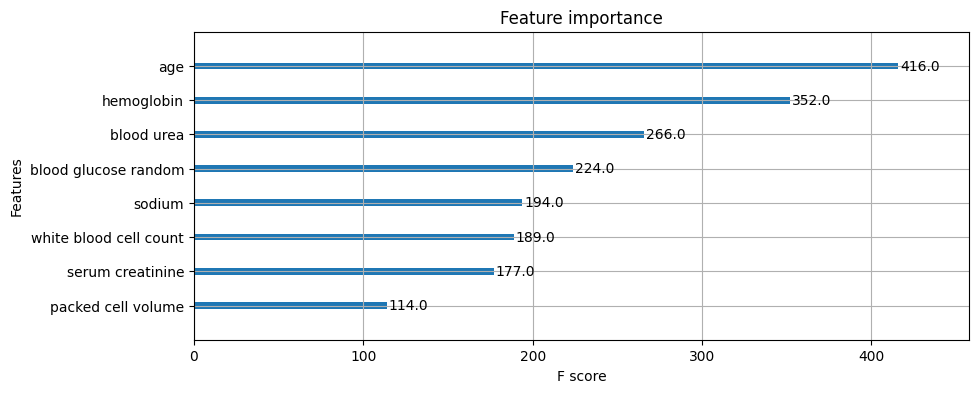

In [36]:
import matplotlib.pyplot as plt
import xgboost as xgb
model = xgb.XGBRegressor()

x = ds.drop('classes', axis = 1)
y = ds.classes

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 4)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [30]:
sel = ['age', 'hemoglobin', 'blood urea', 'blood glucose random', 'serum creatinine', 'sodium', 'white blood cell count', 'packed cell volume', 'classes']
ds = ds[sel]
ds

,age,hemoglobin,blood urea,blood glucose random,serum creatinine,sodium,white blood cell count,packed cell volume,classes
0,48.0,15.4,36.0,121.0,1.2,138.0,72,32,0
1,7.0,11.3,18.0,121.0,0.8,138.0,56,26,0
2,62.0,9.6,53.0,423.0,1.8,138.0,70,19,0
3,48.0,11.2,56.0,117.0,3.8,111.0,62,20,0
4,51.0,11.6,26.0,106.0,1.4,138.0,68,23,0
...,...,...,...,...,...,...,...,...,...
395,55.0,15.7,49.0,140.0,0.5,150.0,62,35,2
396,42.0,16.5,31.0,75.0,1.2,141.0,72,42,2
397,12.0,15.8,26.0,100.0,0.6,137.0,61,37,2
398,17.0,14.2,50.0,114.0,1.0,135.0,67,39,2


In [21]:
ds = ds.loc[ds['classes'] != 1]

In [37]:
x = ds.drop('classes', axis = 1)
y = ds.classes

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.7, random_state = 3)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rand_model = RandomForestClassifier()
rand_model.fit(xtrain, ytrain)

cross_validation = rand_model.predict(xtrain)
print(classification_report(cross_validation, ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           2       1.00      1.00      1.00       112

    accuracy                           1.00       278
   macro avg       1.00      1.00      1.00       278
weighted avg       1.00      1.00      1.00       278



In [39]:
pred = rand_model.predict(xtest)
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        83
           2       0.92      0.95      0.93        37

    accuracy                           0.96       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.96      0.96      0.96       120



In [40]:
joblib.dump(rand_model, open('Kidney_prediModel.pkl', 'wb'))

[Text(0, 0, '248'), Text(0, 0, '150')]

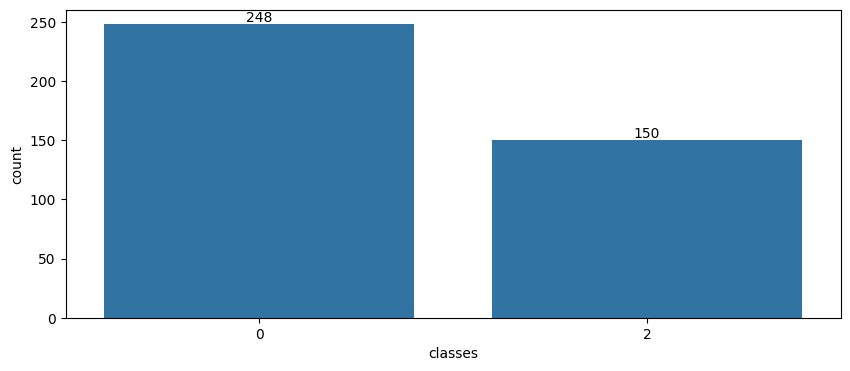

In [44]:
fig = sns.countplot(x = ds.classes)
fig.bar_label(fig.containers[0])